# Worksheet: Orthogonal bases

This worksheet will give you an opportunity to work with orthogonal sets of vectors in $\mathbb{R}^n$, and explore some of the related results. First, we will look at the construction of an orthogonal complement.

## Problem 1
Let $T:\mathbb{R}^7\to\mathbb{R}^4$ be given by $T(\mathbf{x})=A\mathbf{x}$, where
$$
A = \begin{bmatrix} 3&-4&2& 0&1&7&-5\\
                   -4& 7&0&-3&2&0& 1\\
                    0& 5&8&-9&10&27&-19\\
                    2&7&-3&1&5&12&-9\end{bmatrix}
$$

(a) Find a basis for the kernel of $T$ (that is, the nullspace of $A$).

In [49]:
from sympy import Matrix, init_printing, symbols, GramSchmidt
init_printing()

(b) Extend the basis from part (a) to a basis of $\mathbb{R}^7$.

*Suggestion*: recall that you can extend to a basis by adding elements of the standard basis for $\mathbb{R}^7$.

Use the code cell below to enter a matrix you can use to confirm that your basis is, in fact a basis.

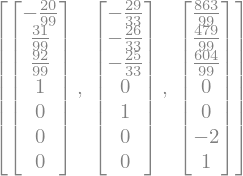

In [2]:
A = Matrix(4,7,[3,-4,2,0,1,7,-5,-4,7,0,-3,2,0,1,0,5,8,-9, 10, 27, -19, 2, 7,-3,1,5,12,-9])
A.nullspace()

Once your testing indicates that you have successfully found a basis, input your basis vectors below.

*Suggestion*: in part (a), you probably used the command `A.nullspace()` to find the basis for $\operatorname{ker}(T)$. If you enter this as
```
B1 = A.nullspace()
B1
```
then you can use the name `B1` to recall those vectors, so you don't have to input them manually. The object `B1` is a list of vectors, and you can call elements of that list as `B1[0]`, `B1[1]`, etc.

First, input the vectors that you added to `B1` to get a basis of $\mathbb{R}^7$. Then, define your basis as a list `B`. You will want to enter something like `B = (B1[0],B1[1],B1[2],e1,e2,e3,e4)`, if you found that there were three vectors in the list `B1`, and that the first 4 standard basis vectors were sufficient to get you a basis for $\mathbb{R}^7$. (This may not be what you find, of course.)

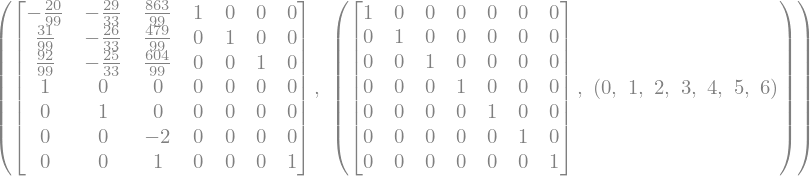

In [27]:
B1 = A.nullspace()
e1 = Matrix([1,0,0,0,0,0,0])
e2 = Matrix([0,1,0,0,0,0,0])
e3 = Matrix([0,0,1,0,0,0,0])
e4 = Matrix([0,0,0,0,0,0,1])

# Create a list of vectors to form a matrix
BMat = [B1[0], B1[1], B1[2], e1, e2, e3, e4]
B = Matrix([BMat])
B, B.rref() # To check if B is linearly independent

(c) Use the Gram-Schmidt algorithm to create an orthogonal basis for $\mathbb{R}^7$ from the basis `B`. You will want to give your new basis a name, so that you can reference its elements later.

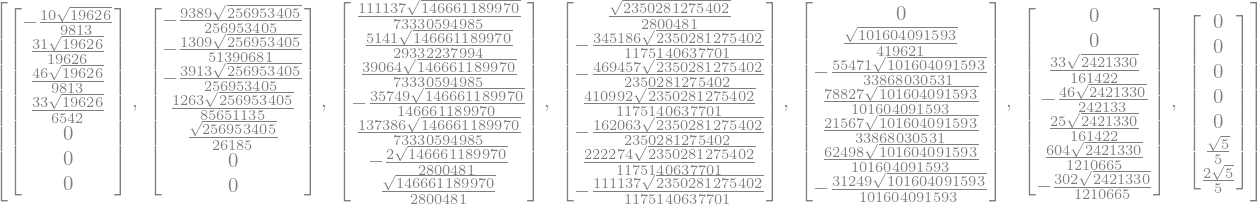

In [50]:
B_basis = GramSchmidt(BMat, True)
b = B_basis
b

(d) Let $U=\operatorname{ker}(T)$. If $\dim U=k$ then the first $k$ vectors of your orthogonal basis for $\mathbb{R}^7$ form an orthgonal basis for $U$, according to the Gram-Schmidt theorem. Confirm that each of the remaining vectors in this basis are orthgonal to the vectors in the basis `B1`.

*Note*: you can compute the dot product of vectors `X` and `Y` using the syntax `X.dot(Y)`.

In [42]:
list1 = [b[0], b[1], b[2]]
list2 = [b[3], b[4], b[5], b[6]]
for vector1 in list1:
    for vector2 in list2:
        print(vector1.dot(vector2))

0
0
0
0
0
0
0
0
0
0
0
0


It follows that these remaining vectors are elements of $U^\bot$. In fact, they form a basis. We know they are independent, because they are part of a basis for $\mathbb{R}^7$. And since $\dim U+\dim U^\bot = \dim \mathbb{R}^7$, we know we have the right number.

(e) Given the vector $\mathbf{x} = (4,-1,6,3,8,2,5)\in\mathbb{R}^7$, find a vector $\mathbf{p}\in U=\operatorname{ker}(T)$ such that $\lVert \mathbf{x}-\mathbf{p}\rVert$ is as small as possible.

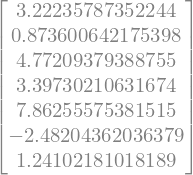

In [48]:
x = Matrix([4,-1,6,3,8,2,5])
p = ((x.dot(b[0]))/(b[0].norm()**2))*b[0]+((x.dot(b[1]))/(b[1].norm()**2))*b[1]+((x.dot(b[2]))/(b[2].norm()**2))*b[2]
# projection
p.evalf()

# Problem 2

[Theorem 3.3.11](https://opentext.uleth.ca/Math3410/section-projection.html#thm-complement-matrix) states the following: given a subspace $U\subseteq \mathbb{R}^n$ with basis $B=\{\mathbf{u}_1,\ldots, \mathbf{u}_k\}$ (not necessarily an orthogonal basis), let $A$ be the $n\times k$ matrix whose columns are the vectors in $B$. Then $U^\bot = \operatorname{null}(A^T)$.

(a) Put another way, this theorem states that $\mathbf{x}\in U^\bot$ if and only if $A^T\mathbf{x}=\mathbf{0}$. Explain why this is true.

The orthogonal complement $U^\perp$ consists of all vectors $\mathbf{x}\in\mathbb{R}^n$ that are orthogonal to each vector in $U$. Since $B = \{\mathbf{u}_1,...,\mathbf{u}_k\}$ is a basis for $U$, any $\mathbf{u}\in U$ can be written in the form $$\mathbf{u} = \sum_{j=1}^k c_j\mathbf{u}_j$$ for scalars $c_1,...,c_k$. If $\mathbf{x}$ is to be in $U^\perp$, then $\mathbf{x}\cdot\mathbf{u} = 0$, so $$\mathbf{x}\cdot\sum_{j=1}^k c_j\mathbf{u}_j = \sum_{j=1}^k c_j(\mathbf{x}\cdot\mathbf{u}_j) = 0.$$ Thus, for each $j = 1,...,k$, $\mathbf{x}\cdot\mathbf{u}_j = 0$. The matrix $A$ is given as $A = (\mathbf{u}_1\cdots\mathbf{u}_k)$, so its transpose $A^T = \left\langle\mathbf{u}_1^T\cdots\mathbf{u}_k^T\right\rangle$. Furthermore, we have $$A^T\mathbf{x} = \left\langle\mathbf{u}_1^T\cdots\mathbf{u}_k^T\right\rangle\mathbf{x} = \left\langle\mathbf{u}_1^T\mathbf{x}\cdots\mathbf{u}_k^T\mathbf{x}\right\rangle,$$ where $\mathbf{u}_j^T\mathbf{x}$ is the same as $\mathbf{u}_j\cdot\mathbf{x}$, so for each $j = 1,...,k$, $\mathbf{u}_j^T\mathbf{x} = 0$. Thus, $$A^T\mathbf{x} = \left\langle\mathbf{u}_1^T\mathbf{x},...,\mathbf{u}_k^T\mathbf{x}\right\rangle = \langle 0,...,0\rangle = \mathbf{0},$$ so $\mathbf{x}\in U^\perp$ iff $A^T\mathbf{x} = \mathbf{0}$ which means that $\mathbf{x}$ is in the null space of $A^T$.

(b) Let $U = \{(4a-3b+2c,a-7b+5c,9a-5c,-3b-7c,-3a+2b-5c,4a-7b)\}\subseteq \mathbb{R}^6$. Determine a basis for $U$, and input the vectors below.

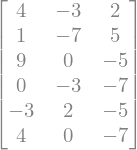

In [7]:
x, y = symbols('x y')
v1 = Matrix([4, 1, 9, 0, -3, 4])
v2 = Matrix([-3, -7, 0, -3, 2, 0])
v3 = Matrix([2, 5, -5, -7, -5, -7])
# U_basis is the basis of U
U_basis_list = [v1, v2, v3]
U_basis = Matrix([U_basis_list])
U_basis

(c) Use Theorem 3.3.11 to find a basis for $U^\bot$.

To calculate $U^{\perp}$, we need to find the nullspace of `U_basis`

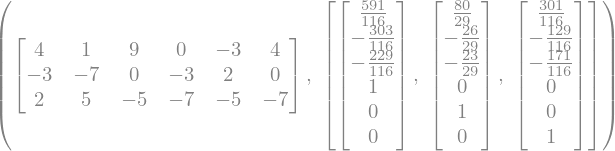

In [8]:
B = U_basis.T
B, B.nullspace()